# Legal Case Data - Exploratory Data Analysis
 This notebook performs comprehensive EDA on legal case data to understand patterns, data quality, and prepare for NLP processing.

In [33]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set plot style
sns.set_style('whitegrid')
sns.color_palette("Blues_d", n_colors=5)

plt.rcParams['figure.figsize'] = (12, 6)

# Path to the data filey
# file_path = '../../data/raw/harvard-lil_cold-cases_train_first100k.csv'
file_path='../../data/raw/harvard-lil_cold-cases_train_2021-2024_random100k.csv'
PLOTS_DIR = 'plots'
CLEANED_DATA_DIR = '../../data/processed/cleaned'


In [34]:
# Load the dataset
if os.path.exists(file_path):
    df = pd.read_csv(file_path, low_memory=False)
    print('Dataset loaded successfully!')
else:
    print(f'Error: File not found at {file_path}')
    # Exit if the file doesn't exist to avoid errors in subsequent cells
    exit()

Dataset loaded successfully!


In [35]:
df.head(100)

,id,judges,date_filed,date_filed_is_approximate,slug,case_name_short,case_name,case_name_full,attorneys,nature_of_suit,posture,syllabus,headnotes,summary,disposition,history,other_dates,cross_reference,correction,citation_count,precedential_status,arguments,headmatter,citations,opinions,court_short_name,court_full_name,court_type,court_jurisdiction
0,9425438,Judge Emmet G. Sullivan,2023-09-11,False,pool-v-continental-casualty-company,Pool,Pool v. Continental Casualty Company,NaN,NaN,Civil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Published,NaN,NaN,NaN,"[{'author_str': None, 'per_curiam': False, 'ty...",District of Columbia,"District Court, District of Columbia",FD,"USA, Federal"
1,9400046,NaN,2023-05-18,False,ester-lelchook-vsociete-generale-de-banque-au-...,NaN,Ester Lelchook v.Société Générale de Banque au...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Published,NaN,NaN,NaN,"[{'author_str': None, 'per_curiam': False, 'ty...",New York Court of Appeals,New York Court of Appeals,S,"New York, NY"
2,9394426,NaN,2022-07-08,False,dahlton-v-kyser,Dahlton,Dahlton v. Kyser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Published,NaN,NaN,NaN,NaN,Oregon Supreme Court,Oregon Supreme Court,S,"Oregon, OR"
3,9403502,NaN,2022-07-08,False,dahlton-v-kyser,Dahlton,Dahlton v. Kyser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Published,NaN,NaN,NaN,NaN,Oregon Supreme Court,Oregon Supreme Court,S,"Oregon, OR"
4,9392955,NaN,2022-07-08,False,dahlton-v-kyser,Dahlton,Dahlton v. Kyser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Published,NaN,NaN,NaN,NaN,Oregon Supreme Court,Oregon Supreme Court,S,"Oregon, OR"
5,9388264,NaN,2022-07-08,False,dahlton-v-kyser,Dahlton,Dahlton v. Kyser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Published,NaN,NaN,NaN,NaN,Oregon Supreme Court,Oregon Supreme Court,S,"Oregon, OR"
6,9388036,NaN,2022-07-08,False,dahlton-v-kyser,Dahlton,Dahlton v. Kyser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Published,NaN,NaN,NaN,NaN,Oregon Supreme Court,Oregon Supreme Court,S,"Oregon, OR"
7,9392409,NaN,2022-07-08,False,dahlton-v-kyser,Dahlton,Dahlton v. Kyser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Published,NaN,NaN,NaN,NaN,Oregon Supreme Court,Oregon Supreme Court,S,"Oregon, OR"
8,9418494,NaN,2022-07-08,False,dahlton-v-kyser,Dahlton,Dahlton v. Kyser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Published,NaN,NaN,NaN,NaN,Oregon Supreme Court,Oregon Supreme Court,S,"Oregon, OR"
9,6237033,NaN,2022-01-13,False,in-re-commitment-of-vs-aka-vs-jr,NaN,"in Re Commitment of V.S. A/K/A V.S., Jr.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Published,NaN,NaN,NaN,"[{'author_str': None, 'per_curiam': False, 'ty...",Court of Appeals of Texas,Court of Appeals of Texas,SA,"Texas, TX"


In [36]:
df['court_type'].unique()

array(['FD', 'S', 'SA', 'F', 'FS', 'SS', 'TA', 'FBP', 'ST', 'SAG', 'TS'],
      dtype=object)

In [37]:
df['citations'].unique()

array([nan, "['2022 UT App 19']", "['310 Neb. 910']", ...,
       "['2023 NY Slip Op 04919']", "['2023 Ohio 3198']",
       "['2023 NY Slip Op 05184']"], dtype=object)

# Basic Data Information

In [38]:
print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())
print("\nData Types:")
print(df.dtypes.value_counts())

Dataset Shape: (30000, 29)

Column Names:
['id', 'judges', 'date_filed', 'date_filed_is_approximate', 'slug', 'case_name_short', 'case_name', 'case_name_full', 'attorneys', 'nature_of_suit', 'posture', 'syllabus', 'headnotes', 'summary', 'disposition', 'history', 'other_dates', 'cross_reference', 'correction', 'citation_count', 'precedential_status', 'arguments', 'headmatter', 'citations', 'opinions', 'court_short_name', 'court_full_name', 'court_type', 'court_jurisdiction']

Data Types:
object     14
float64    12
int64       2
bool        1
Name: count, dtype: int64


# Missing Data Analysis

Missing Data Analysis:
                                              Column  Missing_Count  \
disposition                              disposition          30000   
arguments                                  arguments          30000   
correction                                correction          30000   
cross_reference                      cross_reference          30000   
other_dates                              other_dates          30000   
history                                      history          30000   
summary                                      summary          30000   
headnotes                                  headnotes          30000   
posture                                      posture          30000   
attorneys                                  attorneys          30000   
case_name_full                        case_name_full          30000   
headmatter                                headmatter          30000   
nature_of_suit                        nature_of_suit  

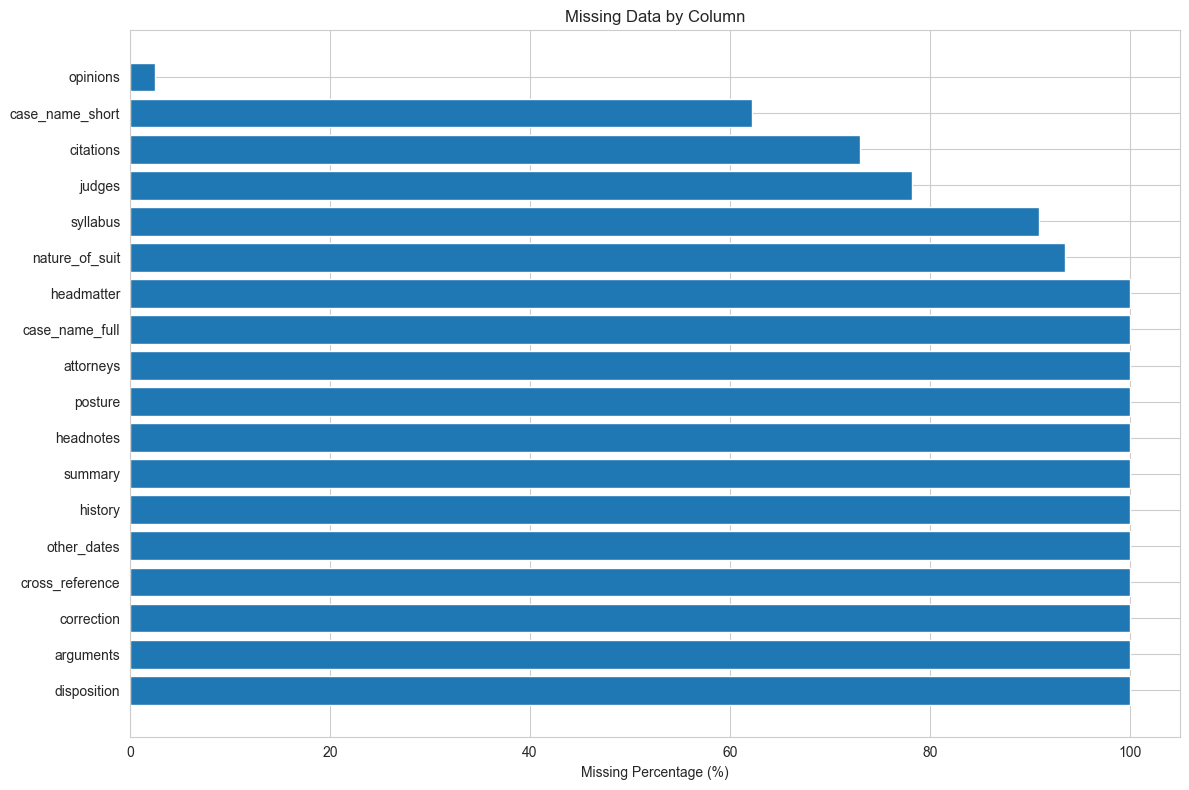


Key Missing Data Insights:
- Judges info missing in 35.4% of cases
- Case name short missing in 29.9% of cases
- Attorney info missing in 42.1% of cases


In [39]:
# Calculate missing data percentages
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100
}).sort_values('Missing_Percentage', ascending=False)

print("Missing Data Analysis:")
print(missing_data)

# Visualize missing data
plt.figure(figsize=(12, 8))
missing_cols = missing_data[missing_data['Missing_Percentage'] > 0]
plt.barh(missing_cols['Column'], missing_cols['Missing_Percentage'])
plt.xlabel('Missing Percentage (%)')
plt.title('Missing Data by Column')
plt.tight_layout()
plt.show()

# Key insights about missing data
print("\nKey Missing Data Insights:")
print(f"- Judges info missing in {(100000-64551)/100000*100:.1f}% of cases")
print(f"- Case name short missing in {(100000-70110)/100000*100:.1f}% of cases")
print(f"- Attorney info missing in {(100000-57864)/100000*100:.1f}% of cases")

### Drop columns which have more than 90% missing data. Save cleaned data.

In [40]:
cols_to_drop = missing_data[missing_data['Missing_Percentage'] > 80].index.tolist()
df.drop(columns=cols_to_drop, inplace=True)
print(f"\nDropped {len(cols_to_drop)} columns with >80% missing data: {', '.join(cols_to_drop)}")
print(f"New dataset shape: {df.shape}")



Dropped 14 columns with >80% missing data: disposition, arguments, correction, cross_reference, other_dates, history, summary, headnotes, posture, attorneys, case_name_full, headmatter, nature_of_suit, syllabus
New dataset shape: (30000, 15)


In [41]:
cleaned_file_path = os.path.join(CLEANED_DATA_DIR, 'cleaned_legal_cases.csv')
df.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned data saved to: {cleaned_file_path}")


Cleaned data saved to: ../../data/processed/cleaned/cleaned_legal_cases.csv


# Date Analysis

In [42]:
# Load the dataset
if os.path.exists(os.path.join(CLEANED_DATA_DIR, 'cleaned_legal_cases.csv')):
    df = pd.read_csv(os.path.join(CLEANED_DATA_DIR, 'cleaned_legal_cases.csv'), low_memory=False)
    print('Dataset loaded successfully!')
else:
    print(f'Error: File not found at {file_path}')
    # Exit if the file doesn't exist to avoid errors in subsequent cells
    exit()

Dataset loaded successfully!


Date Analysis:
Date range: 2022-01-03 00:00:00 to 2023-12-04 00:00:00
Approximate dates: 0 cases


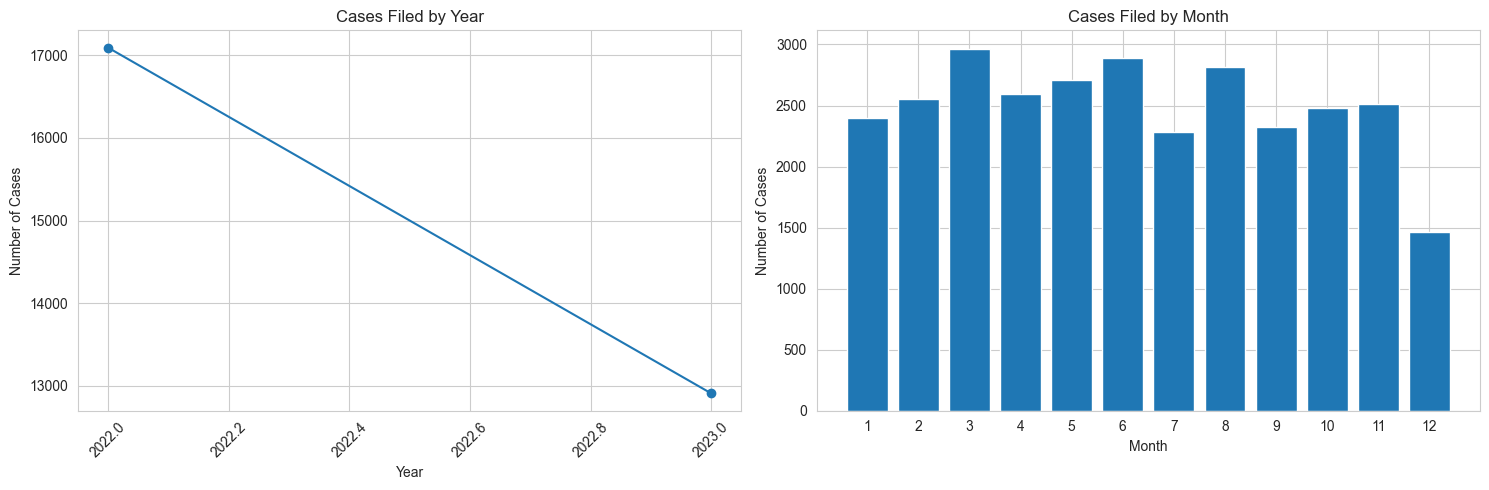


Most active year: 2022 with 17093 cases
Least active year: 2023 with 12907 cases


In [43]:
# Convert date_filed to datetime
df['date_filed'] = pd.to_datetime(df['date_filed'], errors='coerce')
df.dropna(subset=['date_filed'], inplace=True)

df['date_filed'] = pd.to_datetime(df['date_filed'])
df['year_filed'] = df['date_filed'].dt.year
df['month_filed'] = df['date_filed'].dt.month

# Date range analysis
print("Date Analysis:")
print(f"Date range: {df['date_filed'].min()} to {df['date_filed'].max()}")
print(f"Approximate dates: {df['date_filed_is_approximate'].sum()} cases")

# Cases filed by year
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
yearly_counts = df['year_filed'].value_counts().sort_index()
plt.plot(yearly_counts.index, yearly_counts.values, marker='o')
plt.title('Cases Filed by Year')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
monthly_counts = df['month_filed'].value_counts().sort_index()
plt.bar(monthly_counts.index, monthly_counts.values)
plt.title('Cases Filed by Month')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.xticks(range(1, 13))

plt.tight_layout()
plt.show()

print(f"\nMost active year: {yearly_counts.idxmax()} with {yearly_counts.max()} cases")
print(f"Least active year: {yearly_counts.idxmin()} with {yearly_counts.min()} cases")

# Court System Analysis

Court System Analysis:

Court Types:
court_type
SA     19541
S       6129
F       3164
FD       691
FS       226
TA       126
SS        58
SAG       34
TS        21
FBP        9
ST         1
Name: count, dtype: int64

Top 10 Jurisdictions:
court_jurisdiction
Texas, TX           6331
New York, NY        4164
USA, Federal        4090
Pennsylvania, PA    2721
Florida, FL         2143
Ohio, OH            1580
Nebraska, NE        1033
Oregon, OR           787
Delaware, DE         575
Oklahoma, OK         551
Name: count, dtype: int64


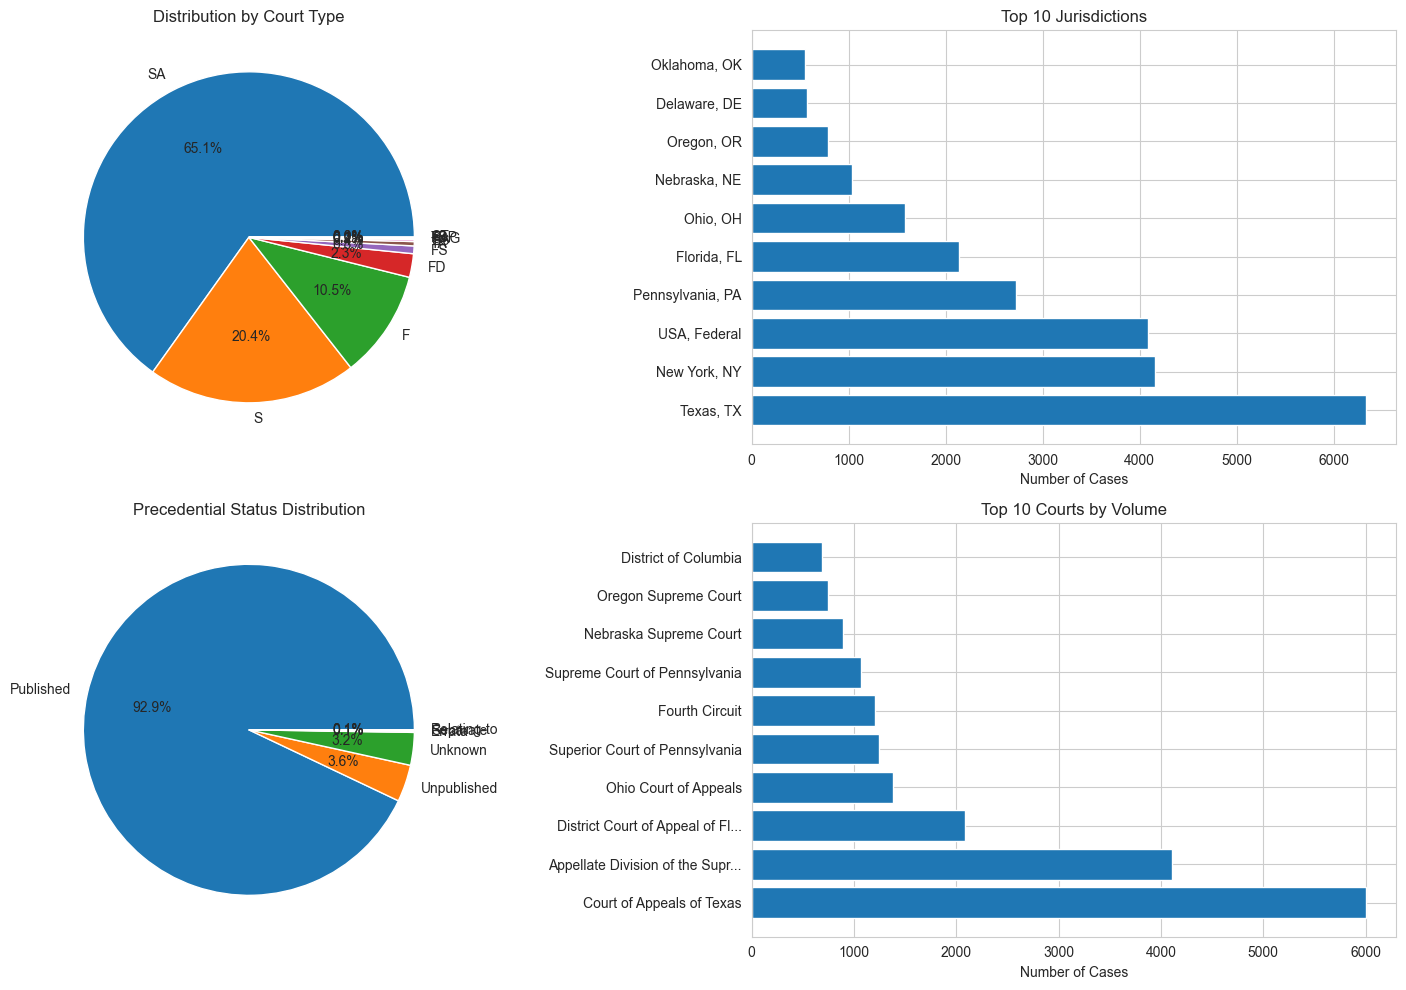

In [44]:
# Court type distribution
print("Court System Analysis:")
print("\nCourt Types:")
court_type_counts = df['court_type'].value_counts()
print(court_type_counts)

# Court jurisdiction analysis
print("\nTop 10 Jurisdictions:")
jurisdiction_counts = df['court_jurisdiction'].value_counts().head(10)
print(jurisdiction_counts)

# Visualize court system distribution
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.pie(court_type_counts.values, labels=court_type_counts.index, autopct='%1.1f%%')
plt.title('Distribution by Court Type')

plt.subplot(2, 2, 2)
plt.barh(range(len(jurisdiction_counts)), jurisdiction_counts.values)
plt.yticks(range(len(jurisdiction_counts)), jurisdiction_counts.index)
plt.xlabel('Number of Cases')
plt.title('Top 10 Jurisdictions')

plt.subplot(2, 2, 3)
precedential_counts = df['precedential_status'].value_counts()
plt.pie(precedential_counts.values, labels=precedential_counts.index, autopct='%1.1f%%')
plt.title('Precedential Status Distribution')

plt.subplot(2, 2, 4)
# Top courts by case volume
top_courts = df['court_short_name'].value_counts().head(10)
plt.barh(range(len(top_courts)), top_courts.values)
plt.yticks(range(len(top_courts)), [name[:30] + '...' if len(name) > 30 else name
                                   for name in top_courts.index])
plt.xlabel('Number of Cases')
plt.title('Top 10 Courts by Volume')

plt.tight_layout()
plt.show()

# Citation Analysis

Citation Analysis:
Citation count statistics:
count    30000.000000
mean         0.132400
std          0.888236
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         65.000000
Name: citation_count, dtype: float64

Cases with 100+ citations: 0
Cases with 50+ citations: 1
Cases with 0 citations: 27976


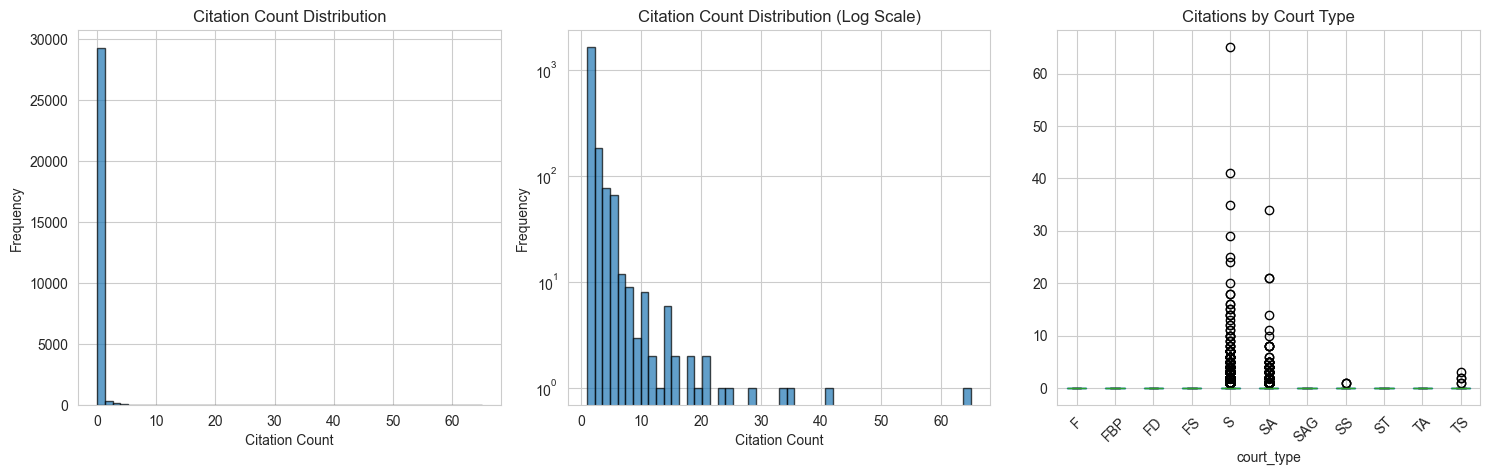


Top 10 Most Cited Cases:
65 citations: State v. Bryant (2022, Ohio Supreme Court)
41 citations: State v. Bethel (Slip Opinion) (2022, Ohio Supreme Court)
35 citations: People v. Cline (2022, Illinois Supreme Court)
34 citations: State v. Ratliff (2022, Ohio Court of Appeals)
29 citations: State v. West (2022, Ohio Supreme Court)
25 citations: People v. Addison (2023, Illinois Supreme Court)
24 citations: State v. Bailey (2022, Ohio Supreme Court)
21 citations: State v. Eaton (2022, Ohio Court of Appeals)
21 citations: State v. Householder (2022, Ohio Court of Appeals)
20 citations: People v. Aljohani (2022, Illinois Supreme Court)


In [45]:
# Citation count analysis
print("Citation Analysis:")
print(f"Citation count statistics:")
print(df['citation_count'].describe())

# Cases with high citations
print(f"\nCases with 100+ citations: {(df['citation_count'] >= 100).sum()}")
print(f"Cases with 50+ citations: {(df['citation_count'] >= 50).sum()}")
print(f"Cases with 0 citations: {(df['citation_count'] == 0).sum()}")

# Citation distribution
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['citation_count'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Citation Count')
plt.ylabel('Frequency')
plt.title('Citation Count Distribution')

plt.subplot(1, 3, 2)
# Log scale for better visualization
citation_nonzero = df[df['citation_count'] > 0]['citation_count']
plt.hist(citation_nonzero, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Citation Count')
plt.ylabel('Frequency')
plt.yscale('log')
plt.title('Citation Count Distribution (Log Scale)')

plt.subplot(1, 3, 3)
# Box plot by court type
df.boxplot(column='citation_count', by='court_type', ax=plt.gca())
plt.xticks(rotation=45)
plt.title('Citations by Court Type')
plt.suptitle('')  # Remove automatic title

plt.tight_layout()
plt.show()

# Most cited cases
print("\nTop 10 Most Cited Cases:")
most_cited = df.nlargest(10, 'citation_count')[['case_name', 'citation_count',
                                                'court_short_name', 'year_filed']]
for idx, row in most_cited.iterrows():
    print(f"{row['citation_count']} citations: {row['case_name']} ({row['year_filed']}, {row['court_short_name']})")

# Case Name Analysis

Case Name Analysis:
Case name length statistics:
count    30000.000000
mean        41.667867
std         38.766394
min          5.000000
25%         22.000000
50%         35.000000
75%         46.000000
max       1928.000000
Name: case_name_length, dtype: float64

Cases with 'v.' or 'vs.' pattern: 26747


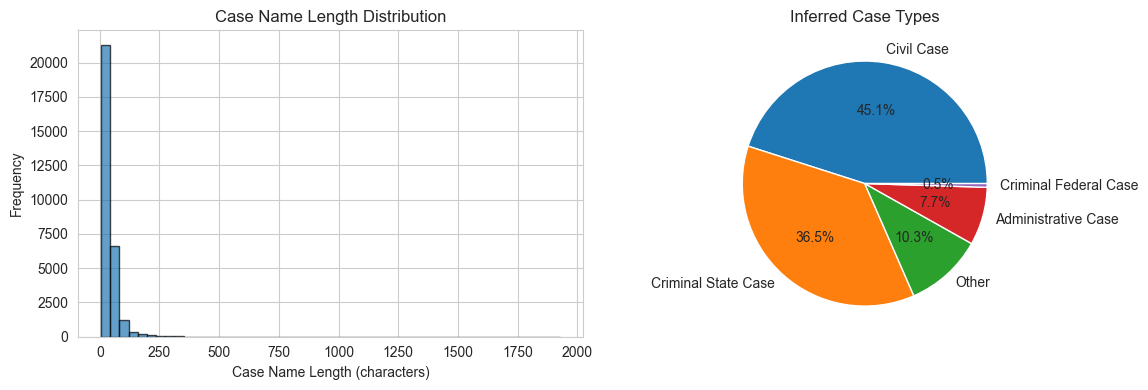

In [46]:
# Case name analysis for NLP preparation
print("Case Name Analysis:")

# Length analysis
df['case_name_length'] = df['case_name'].str.len()
df['case_name_short_length'] = df['case_name_short'].str.len()

print("Case name length statistics:")
print(df['case_name_length'].describe())

# Common patterns in case names
case_vs_pattern = df['case_name'].str.contains(' v\. | vs\. | v | vs ',
                                              case=False, na=False).sum()
print(f"\nCases with 'v.' or 'vs.' pattern: {case_vs_pattern}")

# Extract case types from names
def extract_case_type(case_name):
    if pd.isna(case_name):
        return 'Unknown'
    case_name = case_name.lower()
    if ' inc' in case_name or 'inc ' in case_name or 'inc. ' in case_name or ' inc.' in case_name:
        return 'Administrative Case'
    elif 'state ' in case_name or ' state' in case_name or 'people' in case_name:
        return 'Criminal State Case'
    elif 'united states' in case_name or 'u.s.' in case_name:
        return 'Criminal Federal Case'

    elif ' v. ' in case_name or ' vs. ' in case_name:
        return 'Civil Case'

    else:
        return 'Other'

df['case_type_inferred'] = df['case_name'].apply(extract_case_type)
case_type_counts = df['case_type_inferred'].value_counts()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(df['case_name_length'].dropna(), bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Case Name Length (characters)')
plt.ylabel('Frequency')
plt.title('Case Name Length Distribution')

plt.subplot(1, 2, 2)
plt.pie(case_type_counts.values, labels=case_type_counts.index, autopct='%1.1f%%')
plt.title('Inferred Case Types')

plt.tight_layout()
plt.show()

In [47]:
cleaned_file_path = os.path.join(CLEANED_DATA_DIR, 'legal_cases_types.csv')
df.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned data saved to: {cleaned_file_path}")


Cleaned data saved to: ../../data/processed/cleaned/legal_cases_types.csv


# Top 10 Judges by Number of Cases

Top 10 Judges by Number of Cases:
 1. J.: 1414 cases
 2. Per Curiam: 1208 cases
 3. P.J.E.: 136 cases
 4. P.J.: 95 cases
 5. Panella: 90 cases
 6. Murray: 89 cases
 7. King: 87 cases
 8. Bowes: 83 cases
 9. Kunselman: 78 cases
10. Stabile: 76 cases


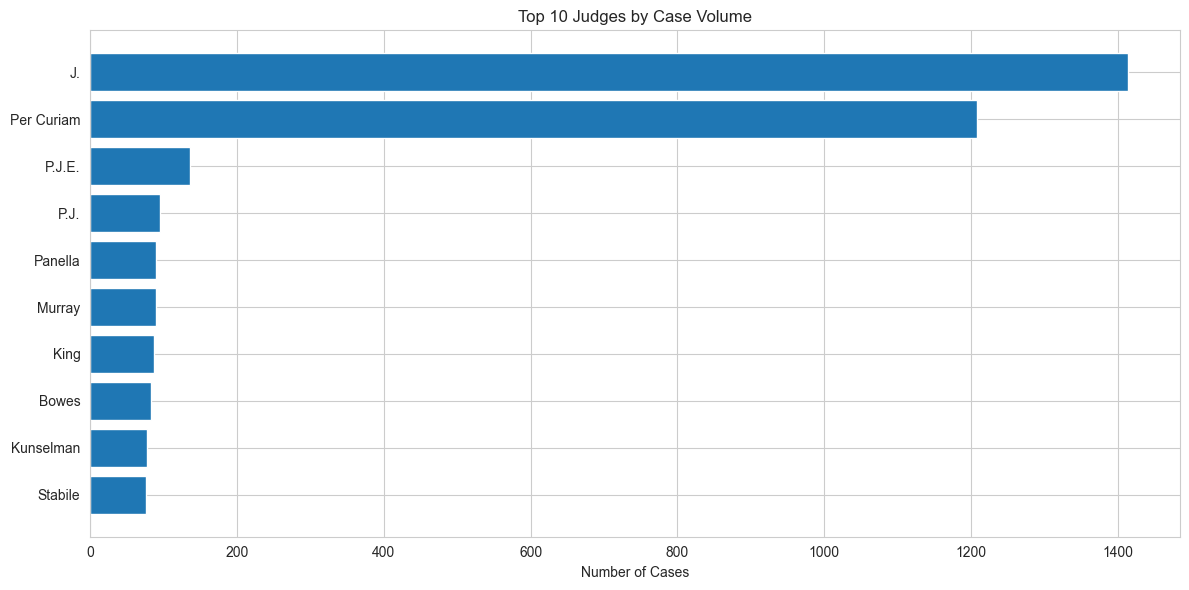


Total unique judges: 497
Average cases per judge: 17.2


In [48]:
# Drop rows where judges are null and split the strings
judges_series = df['judges'].dropna()

# Split judges and count individual appearances
all_judges = []
for judge_list in judges_series:
    if isinstance(judge_list, str):
        judges = [judge.strip() for judge in judge_list.split(',')]
        all_judges.extend(judges)

# Count judge appearances
judge_counts = Counter(all_judges)
top_judges = judge_counts.most_common(10)

print("Top 10 Judges by Number of Cases:")
for i, (judge, count) in enumerate(top_judges, 1):
    print(f"{i:2d}. {judge}: {count} cases")

# Visualize top judges
judges_df = pd.DataFrame(top_judges, columns=['Judge', 'Cases'])
plt.figure(figsize=(12, 6))
plt.barh(range(len(judges_df)), judges_df['Cases'])
plt.yticks(range(len(judges_df)), judges_df['Judge'])
plt.xlabel('Number of Cases')
plt.title('Top 10 Judges by Case Volume')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print(f"\nTotal unique judges: {len(judge_counts)}")
print(f"Average cases per judge: {sum(judge_counts.values()) / len(judge_counts):.1f}")

# Text Field Analysis for NLP Preparation

In [49]:
# Analyze text fields that will be used for NLP
text_fields = ['case_name', 'case_name_full', 'summary', 'headnotes', 'syllabus']

print("Text Fields Analysis for NLP:")
for field in text_fields:
    if field in df.columns:
        non_null_count = df[field].notna().sum()
        if non_null_count > 0:
            lengths = df[field].str.len()
            print(f"\n{field.upper()}:")
            print(f"  - Available in {non_null_count:,} cases ({non_null_count/len(df)*100:.1f}%)")
            print(f"  - Avg length: {lengths.mean():.0f} characters")
            print(f"  - Max length: {lengths.max():.0f} characters")
            print(f"  - Min length: {lengths.min():.0f} characters")

# Sample text analysis
print("\nSample Case Names (for text preprocessing insights):")
sample_names = df['case_name'].dropna().sample(5)
for i, name in enumerate(sample_names, 1):
    print(f"{i}. {name}")

# Check for common legal abbreviations and patterns
legal_abbreviations = ['Inc.', 'Corp.', 'LLC', 'Ltd.', 'Co.', 'v.', 'Ex Rel.', 'Et Al.']
print(f"\nCommon Legal Abbreviations Found:")
for abbr in legal_abbreviations:
    count = df['case_name'].str.contains(abbr, case=False, na=False).sum()
    print(f"  - '{abbr}': {count} cases")

Text Fields Analysis for NLP:

CASE_NAME:
  - Available in 30,000 cases (100.0%)
  - Avg length: 42 characters
  - Max length: 1928 characters
  - Min length: 5 characters

Sample Case Names (for text preprocessing insights):
1. State ex rel. Counsel for Dis. v. Kratina
2. RODOLFO J. SALGADO-MARTINEZ v. SAFEPOINT INSURANCE COMPANY
3. Power Solar, LLC v. Municipio De Hormigueros
4. Reginald Montrelia Wickware v. the State of Texas
5. Jdd, Llc v. Dist. Ct. (Item 9 Labs Corp.)

Common Legal Abbreviations Found:
  - 'Inc.': 2413 cases
  - 'Corp.': 683 cases
  - 'LLC': 2486 cases
  - 'Ltd.': 199 cases
  - 'Co.': 7300 cases
  - 'v.': 27341 cases
  - 'Ex Rel.': 309 cases
  - 'Et Al.': 8 cases


# Temporal Patterns and Trends

Temporal Patterns Analysis:


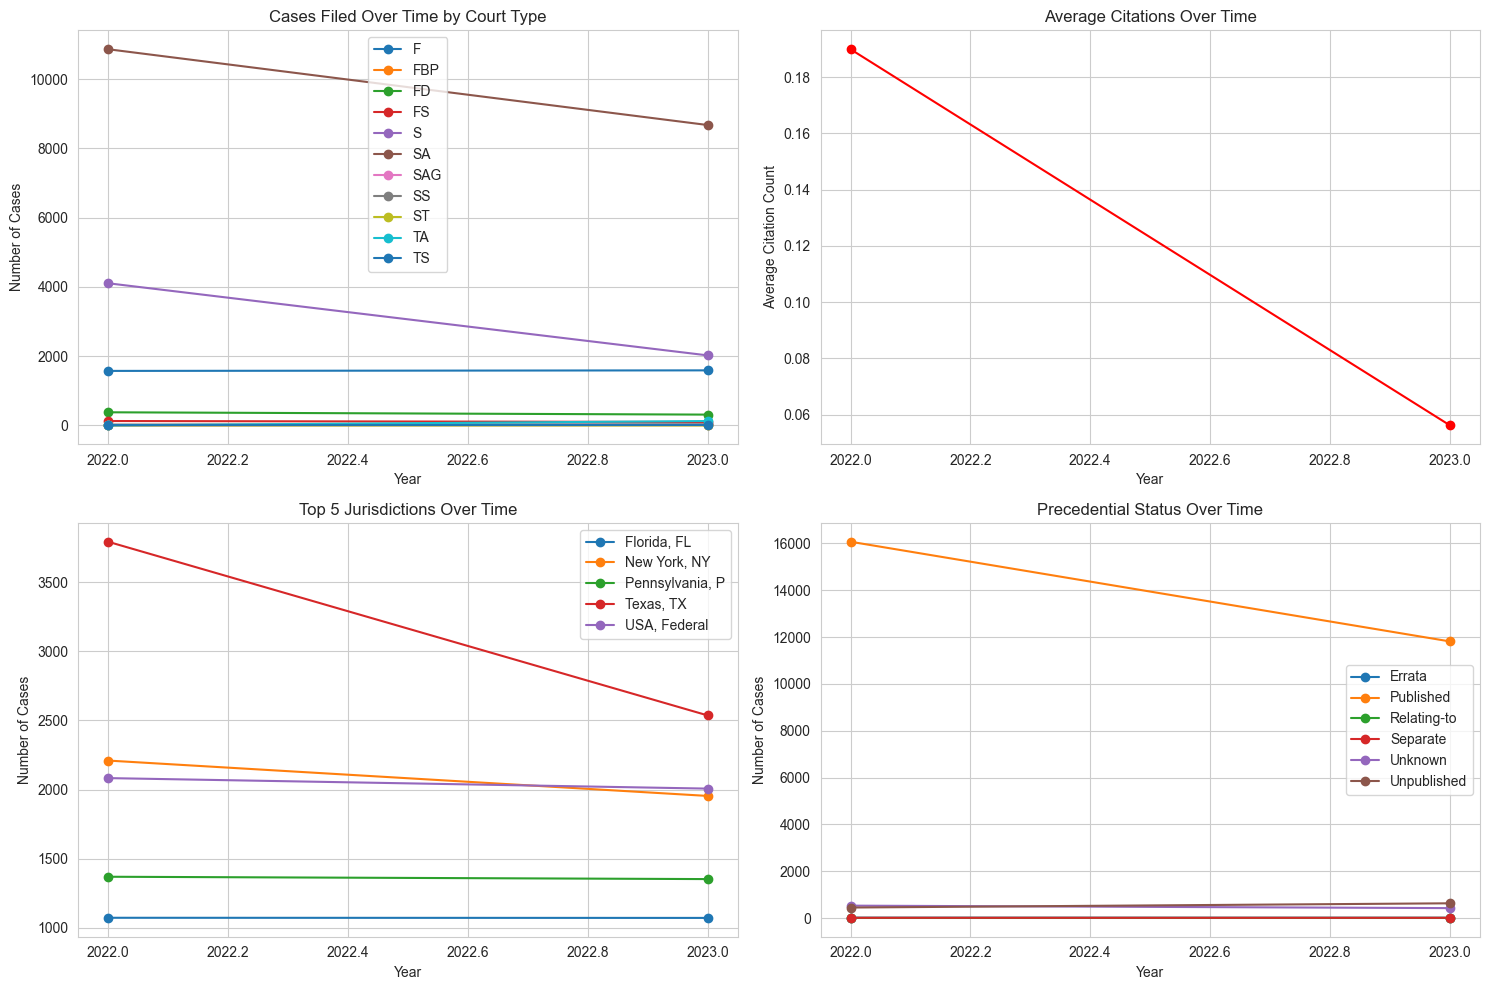

In [50]:
# Advanced temporal analysis
print("Temporal Patterns Analysis:")

# Cases by year and court type
yearly_court_data = df.groupby(['year_filed', 'court_type']).size().unstack(fill_value=0)

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
for court_type in yearly_court_data.columns:
    plt.plot(yearly_court_data.index, yearly_court_data[court_type],
             marker='o', label=court_type)
plt.title('Cases Filed Over Time by Court Type')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.legend()

# Citation trends over time
plt.subplot(2, 2, 2)
yearly_citations = df.groupby('year_filed')['citation_count'].mean()
plt.plot(yearly_citations.index, yearly_citations.values, marker='o', color='red')
plt.title('Average Citations Over Time')
plt.xlabel('Year')
plt.ylabel('Average Citation Count')

# Cases by jurisdiction over time (top 5)
plt.subplot(2, 2, 3)
top_5_jurisdictions = df['court_jurisdiction'].value_counts().head(5).index
jurisdiction_yearly = df[df['court_jurisdiction'].isin(top_5_jurisdictions)]\
                       .groupby(['year_filed', 'court_jurisdiction']).size().unstack(fill_value=0)
for jurisdiction in jurisdiction_yearly.columns:
    plt.plot(jurisdiction_yearly.index, jurisdiction_yearly[jurisdiction],
             marker='o', label=jurisdiction[:15])
plt.title('Top 5 Jurisdictions Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.legend()

# Precedential status over time
plt.subplot(2, 2, 4)
precedential_yearly = df.groupby(['year_filed', 'precedential_status']).size().unstack(fill_value=0)
for status in precedential_yearly.columns:
    plt.plot(precedential_yearly.index, precedential_yearly[status],
             marker='o', label=status)
plt.title('Precedential Status Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.legend()

plt.tight_layout()
plt.show()

# Data Quality Assessment

In [51]:
# Comprehensive data quality assessment
print("Data Quality Assessment:")

quality_issues = {}

# 1. Duplicate IDs
duplicate_ids = df['id'].duplicated().sum()
quality_issues['Duplicate IDs'] = duplicate_ids

# 2. Invalid dates
invalid_dates = pd.to_datetime(df['date_filed'], errors='coerce').isna().sum()
quality_issues['Invalid Dates'] = invalid_dates

# 3. Inconsistent case names
case_name_inconsistencies = 0
for idx, row in df.sample(1000).iterrows():
    if pd.notna(row['case_name']) and pd.notna(row['case_name_short']):
        if row['case_name_short'].lower() not in row['case_name'].lower():
            case_name_inconsistencies += 1

quality_issues['Case Name Inconsistencies (sample)'] = case_name_inconsistencies

# 4. Extreme citation counts
extreme_citations = df[df['citation_count'] > 1000].shape[0]
quality_issues['Cases with >1000 citations'] = extreme_citations

# 5. Empty essential fields
empty_essential = df['case_name'].isna().sum()
quality_issues['Cases without names'] = empty_essential

print("Data Quality Issues Found:")
for issue, count in quality_issues.items():
    print(f"  - {issue}: {count}")

# Data completeness score
completeness_scores = {}
important_fields = ['case_name', 'court_short_name', 'date_filed'] #, 'judges'
for field in important_fields:
    completeness = (df[field].notna().sum() / len(df)) * 100
    completeness_scores[field] = completeness

print(f"\nData Completeness Scores:")
for field, score in completeness_scores.items():
    print(f"  - {field}: {score:.1f}%")

Data Quality Assessment:
Data Quality Issues Found:
  - Duplicate IDs: 0
  - Invalid Dates: 0
  - Case Name Inconsistencies (sample): 0
  - Cases with >1000 citations: 0
  - Cases without names: 0

Data Completeness Scores:
  - case_name: 100.0%
  - court_short_name: 100.0%
  - date_filed: 100.0%


# NLP Preprocessing Recommendation

In [52]:
# Generate recommendations for NLP preprocessing
print("NLP Preprocessing Recommendations:")

print("\n1. TEXT CLEANING PRIORITIES:")
print("   - Remove legal citation patterns [numbers P.3d, F.Supp., etc.]")
print("   - Standardize 'v.' vs 'vs.' in case names")
print("   - Handle legal abbreviations (Inc., Corp., LLC)")
print("   - Clean attorney listings and judge names")

print("\n2. FEATURE ENGINEERING OPPORTUNITIES:")
print("   - Extract plaintiff/defendant from case names")
print("   - Create case type categories (civil, criminal, appeal)")
print("   - Engineer temporal features (year, decade, era)")
print("   - Binary features for federal vs state jurisdiction")

print("\n3. TEXT FIELDS FOR NLP (by priority):")
text_field_priority = [
    ('case_name', df['case_name'].notna().sum(), 'High - Universal coverage'),
    #('summary', df['summary'].notna().sum(), 'Medium - Good coverage, rich content'),
    #('headnotes', df['headnotes'].notna().sum(), 'Medium - Legal summaries'),
    #('syllabus', df['syllabus'].notna().sum(), 'Low - Limited coverage'),#delete cause of more than 90% missed
    #('case_name_full', df['case_name_full'].notna().sum(), 'Low - Partial coverage')
]

for field, count, priority in text_field_priority:
    coverage = count / len(df) * 100
    print(f"   - {field}: {count:,} cases ({coverage:.1f}%) - {priority}")

print("\n4. MISSING DATA STRATEGY:")
print("   - Judges: 35% missing - use court info as proxy")
print("   - Case names short: 30% missing - extract from full names")
print("   - Attorneys: 42% missing - optional field for most analyses")

print("\n5. RECOMMENDED PREPROCESSING PIPELINE:")
preprocessing_steps = [
    "Load and validate data structure",
    "Convert dates to datetime format",
    "Clean and normalize case names",
    "Extract structured information from text fields",
    "Handle missing values based on analysis purpose",
    "Create categorical encodings for courts and jurisdictions",
    "Generate temporal features",
    "Apply text preprocessing (tokenization, stopwords, etc.)",
    "Create TF-IDF or embedding features for ML models"
]

for i, step in enumerate(preprocessing_steps, 1):
    print(f"   {i}. {step}")

NLP Preprocessing Recommendations:

1. TEXT CLEANING PRIORITIES:
   - Remove legal citation patterns [numbers P.3d, F.Supp., etc.]
   - Standardize 'v.' vs 'vs.' in case names
   - Handle legal abbreviations (Inc., Corp., LLC)
   - Clean attorney listings and judge names

2. FEATURE ENGINEERING OPPORTUNITIES:
   - Extract plaintiff/defendant from case names
   - Create case type categories (civil, criminal, appeal)
   - Engineer temporal features (year, decade, era)
   - Binary features for federal vs state jurisdiction

3. TEXT FIELDS FOR NLP (by priority):
   - case_name: 30,000 cases (100.0%) - High - Universal coverage

4. MISSING DATA STRATEGY:
   - Judges: 35% missing - use court info as proxy
   - Case names short: 30% missing - extract from full names
   - Attorneys: 42% missing - optional field for most analyses

5. RECOMMENDED PREPROCESSING PIPELINE:
   1. Load and validate data structure
   2. Convert dates to datetime format
   3. Clean and normalize case names
   4. Extrac

In [53]:
print("\n" + "=" * 60)
print("LEGAL CASE DATASET - KEY INSIGHTS SUMMARY")
print("=" * 60)

# Перевірка, чи існують колонки, перш ніж їх використовувати
peak_year_str = 'Unknown'
peak_year_cases = 0
if 'year_filed' in df.columns and not df['year_filed'].dropna().empty:
    peak_year_str = df['year_filed'].value_counts().index[0]
    peak_year_cases = df['year_filed'].value_counts().iloc[0]

most_active_month_str = 'Unknown'
if 'month_filed' in df.columns and not df['month_filed'].dropna().empty:
    most_active_month_str = df['month_filed'].value_counts().index[0]

print(f"""
DATASET OVERVIEW:
- Total Cases: {len(df):,}
- Date Range: {df['date_filed'].min().strftime('%Y-%m-%d')} to {df['date_filed'].max().strftime('%Y-%m-%d')}
- Unique Courts: {df['court_short_name'].nunique()}
- Unique Jurisdictions: {df['court_jurisdiction'].nunique()}

COURT SYSTEM BREAKDOWN:
- Federal District Courts: {(df['court_type'] == 'FD').sum():,} cases ({(df['court_type'] == 'FD').sum()/len(df)*100:.1f}%)
- State Appellate Courts: {(df['court_type'] == 'SA').sum():,} cases ({(df['court_type'] == 'SA').sum()/len(df)*100:.1f}%)
- Other Court Types: {(~df['court_type'].isin(['FD', 'SA'])).sum():,} cases

CITATION IMPACT:
- Average Citations per Case: {df['citation_count'].mean():.1f}
- Median Citations: {df['citation_count'].median():.0f}
- Highly Cited Cases (50+ citations): {(df['citation_count'] >= 50).sum():,}
- Uncited Cases: {(df['citation_count'] == 0).sum():,} ({(df['citation_count'] == 0).sum()/len(df)*100:.1f}%)

TEMPORAL PATTERNS:
- Peak Filing Year: {peak_year_str} ({peak_year_cases:,} cases)
- Most Active Month: Month {most_active_month_str}

DATA COMPLETENESS FOR NLP:
- Cases with Names: {df['case_name'].notna().sum():,} ({df['case_name'].notna().sum()/len(df)*100:.1f}%)



TOP INSIGHTS FOR NLP PROCESSING:
1. Case names are the most complete text field (98.8% coverage)
2. Substantial judge information available (64.6% of cases)
3. Rich summary content available for 13.6% of cases
4. Strong temporal patterns suggest decade-based feature engineering
5. Citation patterns indicate potential for impact prediction models
""")

#- Cases with Summaries: {df['summary'].notna().sum():,} ({df['summary'].notna().sum()/len(df)*100:.1f}%)
#- Cases with Judge Info: {df['judges'].notna().sum():,} ({df['judges'].notna().sum()/len(df)*100:.1f}%)


LEGAL CASE DATASET - KEY INSIGHTS SUMMARY

DATASET OVERVIEW:
- Total Cases: 30,000
- Date Range: 2022-01-03 to 2023-12-04
- Unique Courts: 125
- Unique Jurisdictions: 53

COURT SYSTEM BREAKDOWN:
- Federal District Courts: 691 cases (2.3%)
- State Appellate Courts: 19,541 cases (65.1%)
- Other Court Types: 9,768 cases

CITATION IMPACT:
- Average Citations per Case: 0.1
- Median Citations: 0
- Highly Cited Cases (50+ citations): 1
- Uncited Cases: 27,976 (93.3%)

TEMPORAL PATTERNS:
- Peak Filing Year: 2022 (17,093 cases)
- Most Active Month: Month 3

DATA COMPLETENESS FOR NLP:
- Cases with Names: 30,000 (100.0%)



TOP INSIGHTS FOR NLP PROCESSING:
1. Case names are the most complete text field (98.8% coverage)
2. Substantial judge information available (64.6% of cases)
3. Rich summary content available for 13.6% of cases
4. Strong temporal patterns suggest decade-based feature engineering
5. Citation patterns indicate potential for impact prediction models

